In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [21]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [22]:
X_test.shape
Y_train = Y_train.reshape(-1, )
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

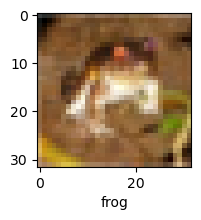

In [24]:
#Making a function for plaotting image for ith index:
def plot_sample(X,Y,i):
    plt.figure(figsize=(15,2))
    plt.imshow(X[i])
    plt.xlabel(classes[Y[i]])


plot_sample(X_train, Y_train, 0)

In [25]:
X_train = X_train/255
X_test = X_test/255

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(optimizer = 'SGD',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 56s 35ms/step - loss: 1.8130 - accuracy: 0.3552
Epoch 2/2
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6223 - accuracy: 0.4283


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report : \n", classification_report(Y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification report : 
               precision    recall  f1-score   support

           0       0.53      0.44      0.48      1000
           1       0.37      0.71      0.49      1000
           2       0.38      0.24      0.30      1000
           3       0.35      0.20      0.26      1000
           4       0.51      0.17      0.25      1000
           5       0.31      0.50      0.38      1000
           6       0.40      0.65      0.50      1000
           7       0.62      0.36      0.46      1000
           8       0.45      0.70      0.55      1000
           9       0.53      0.17      0.26      1000

    accuracy                           0.42     10000
   macro avg       0.45      0.42      0.39     10000
weighted avg       0.45      0.42      0.39     10000



In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    #dense layers:
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train, Y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4794 - accuracy: 0.4678
Epoch 2/2
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1232 - accuracy: 0.6042


In [34]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0509 - accuracy: 0.6362


[1.0508588552474976, 0.6362000107765198]

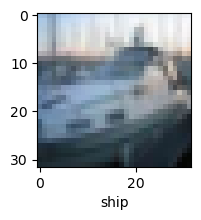

In [38]:
#Now we will like to plot the samples using using the functio we already made above:
#For taht please reshape then Y_test set:
Y_test = Y_test.reshape(-1,)
Y_test[:5]
plot_sample(X_test, Y_test, 2)

In [40]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 8ms/step


array([[8.54243059e-03, 7.62657903e-04, 2.74573993e-02, 5.74227810e-01,
        5.25826821e-03, 2.00886562e-01, 1.04186349e-01, 9.78719443e-04,
        7.60490298e-02, 1.65086391e-03],
       [1.08444765e-01, 2.38266081e-01, 5.04267111e-04, 4.39715950e-05,
        7.68713144e-05, 4.02490423e-06, 1.27878138e-05, 3.15188277e-06,
        6.45148993e-01, 7.49508711e-03],
       [9.05723795e-02, 2.71493882e-01, 6.23435760e-03, 3.41844861e-03,
        1.43626309e-03, 8.88783659e-04, 1.17728801e-03, 9.39155405e-04,
        5.75595498e-01, 4.82439362e-02],
       [8.54951441e-01, 1.71360932e-02, 7.23921368e-03, 3.91493028e-04,
        1.60976162e-03, 4.88737314e-05, 1.54154623e-04, 1.14109840e-04,
        1.17673092e-01, 6.81716716e-04],
       [4.45993152e-04, 4.15280636e-04, 5.22653647e-02, 3.79576236e-02,
        7.50278771e-01, 3.12606618e-02, 1.23774551e-01, 3.03491903e-03,
        2.99682753e-04, 2.67222174e-04]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [42]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [44]:
print("Classification report by using cnn : \n", classification_report(Y_test, y_classes))

Classification report by using cnn : 
               precision    recall  f1-score   support

           0       0.62      0.74      0.68      1000
           1       0.70      0.81      0.75      1000
           2       0.52      0.48      0.50      1000
           3       0.57      0.32      0.41      1000
           4       0.53      0.63      0.58      1000
           5       0.54      0.56      0.55      1000
           6       0.68      0.74      0.71      1000
           7       0.68      0.73      0.70      1000
           8       0.72      0.77      0.75      1000
           9       0.81      0.58      0.68      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.63     10000
weighted avg       0.64      0.64      0.63     10000



## Convolution padding and stride

While moving the convolution box for the given matrix padding is done so as to take in account the corner pixels...So that they don't feel left out...and can take part in evaluation.......
Padding can be either same or valid(normal...no pad) 

Stride "stride=(1,1)" implies that each time in x and y direction the box traverses 1 unit...